# Exploring Convolutional Neural Networks


Explore the impact of different architectures, hyperparameters, and the effectiveness of CNNs in image classification tasks.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Dataset Exploration:

Load and visualize the dataset CIFAR-10
Display a few sample images along with their labels.
Determine and record the shapes of `x_train, y_train, x_test, and y_test`.
Provide a brief explanation of what each dimension in the shapes of `x_train, y_train, x_test, and y_test` represents.

In [2]:
# 1. Dataset Exploration
def load_and_visualize_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Visualize 5 images

    # your code start here
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(x_train[i])
        plt.title(f"Label: {y_train[i][0]}")
        plt.axis('off')
    plt.show()
    # your code ends here

    return x_train, y_train, x_test, y_test


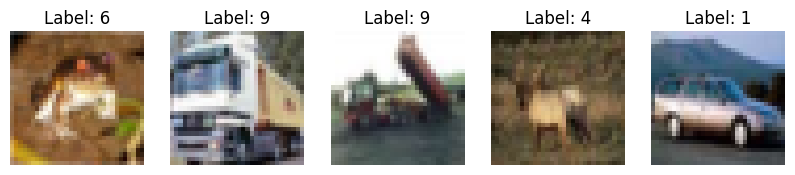

(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

In [3]:
load_and_visualize_data()

## Preprocessing:

Normalize the images for better training performance.

In [4]:
def preprocess_data(x_train, x_test, x_val, y_train, y_test, y_val):
    x_train = x_train.astype('float32') / 255
    # your code start here
    x_val = x_val.astype('float32') / 255
    x_test = x_test.astype('float32') / 255
    # your code start here
    nb_classes = 10

    # Converts a class vector (integers) to binary class matrix to have one-hot encoding label. For example:
    y_train = to_categorical(y_train, nb_classes)
    y_val = to_categorical(y_val, nb_classes)
    y_test = to_categorical(y_test, nb_classes)
    return x_train, x_test, x_val, y_train, y_test, y_val


## Model Implementation

Implement a basic CNN architecture with the following layers:
Convolutional layers
Activation layers (ReLU recommended)
Pooling layers
Fully connected layers
Include at least one dropout layer to reduce overfitting.

In [5]:
def build_model():
    # Create a DenseNet121 base without the top classification layers.
    base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(32, 32, 3), classifier_activation='softmax')
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    return model

In [6]:
# print the model architecture using model.summary()
model = build_model()
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 1, 1, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,146,954 (34.89 MB)

 Trainable params: 9,063,306 (34.57 MB)

 Non-trainable params: 83,648 (326.75 KB)

## Training:

Compile your model with an appropriate loss function and optimizer.
Train your model on the training set and validate it using the validation set.
Plot the training and validation loss and accuracy to assess how your model is learning.

In [ ]:
# define optimizer, loss function, and metrics via model.compile(...)

OPTIMIZER = SGD(learning_rate=0.05)
LOSS = 'binary_crossentropy'
METRICS = ['accuracy']
EPOCHS = 20
BATCH_SIZE = 256


In [ ]:
# 4. Training
def train_model(model, x_train, y_train, x_val, y_val):

    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=(x_val, y_val)
    )

    # Plot training & validation accuracy values

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    return history


## Evaluation:

Evaluate your model's performance on the test set.
Display a confusion matrix to understand your model's predictions in detail.

In [ ]:
# 5. Evaluation
def evaluate_model(model, x_test, y_test):
    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

    # Generate predictions (probabilities) and convert to label predictions
    y_pred_prob = model.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Convert one-hot encoded y_test to label indices
    y_true = np.argmax(y_test, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


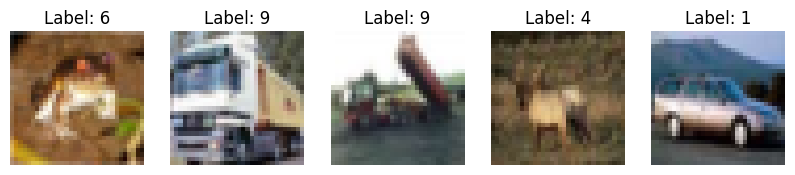

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 193s 583ms/step - accuracy: 0.2233 - loss: 0.3394 - val_accuracy: 0.4649 - val_loss: 0.2949
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.6022 - loss: 0.1921 - val_accuracy: 0.6696 - val_loss: 0.1672
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.7088 - loss: 0.1441 - val_accuracy: 0.7168 - val_loss: 0.1383
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.7632 - loss: 0.1181 - val_accuracy: 0.7404 - val_loss: 0.1282
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.8051 - loss: 0.1004 - val_accuracy: 0.7589 - val_loss: 0.1189
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.8397 - loss: 0.0842 - val_accuracy: 0.7598 - val_loss: 0.1208
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.8692 - loss: 0.0717 - val_accuracy: 0.7742 - val_loss: 0.1151
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.8867 - loss: 0.0624 

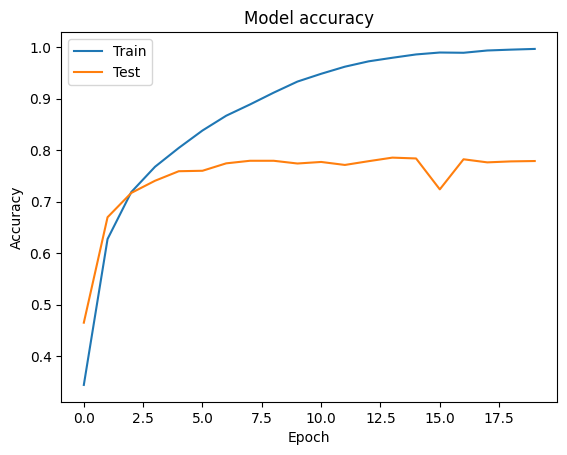

Test Loss: 0.1793, Test Accuracy: 0.7784
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step


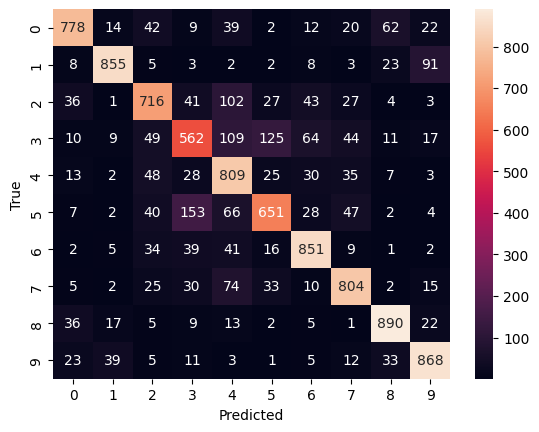

In [9]:
# Main function to run the tasks
def main():
    x_train, y_train, x_test, y_test = load_and_visualize_data()
    # Split training data for validation (simple split for demonstration)
    x_val, y_val = x_train[-10000:], y_train[-10000:]
    x_train, y_train = x_train[:-10000], y_train[:-10000]

    x_train, x_test, x_val, y_train, y_test, y_val = preprocess_data(x_train, x_test, x_val, y_train, y_test, y_val)

    model = build_model()
    model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=METRICS)
    train_model(model, x_train, y_train, x_val, y_val)
    evaluate_model(model, x_test, y_test)

if __name__ == "__main__":
    main()

## Hyperparameter Tuning and Model Improvement:

Experiment with different architectures, adding more convolutional layers with dropout. Show  new model's architecture.

Change hyperparameters such as learning rate and retrain the model.

Train each model with its learning rates and record performance.

Plot learning curves for each scenario.

Test at least two different models with two different learning rates

Discuss how different models and rates affected learning.


### 1. Change the model's architecture by adding more convolutional layers with dropout

In [13]:
def build_model_1():
    # Create a DenseNet121 base without the top classification layers.
    base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(32, 32, 3), classifier_activation='softmax')
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    return model

# print the model architecture using model.summary()
model = build_model()
model.summary()

OPTIMIZER = SGD(learning_rate=0.05)
LOSS = 'binary_crossentropy'
METRICS = ['accuracy']
EPOCHS = 20
BATCH_SIZE = 256

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 1, 1, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,146,954 (34.89 MB)

 Trainable params: 9,063,306 (34.57 MB)

 Non-trainable params: 83,648 (326.75 KB)

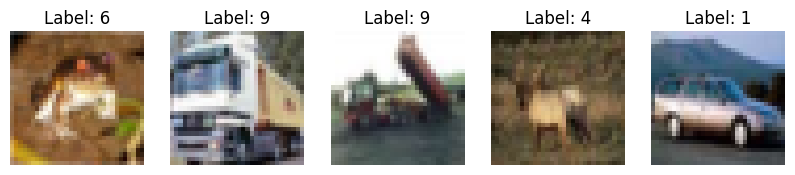

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 188s 627ms/step - accuracy: 0.2092 - loss: 0.3453 - val_accuracy: 0.4291 - val_loss: 0.3096
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 73ms/step - accuracy: 0.5611 - loss: 0.2065 - val_accuracy: 0.6266 - val_loss: 0.1829
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.6882 - loss: 0.1536 - val_accuracy: 0.7016 - val_loss: 0.1439
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.7535 - loss: 0.1251 - val_accuracy: 0.7120 - val_loss: 0.1387
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.7965 - loss: 0.1050 - val_accuracy: 0.7438 - val_loss: 0.1244
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.8225 - loss: 0.0911 - val_accuracy: 0.7613 - val_loss: 0.1180
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.8549 - loss: 0.0774 - val_accuracy: 0.7724 - val_loss: 0.1143
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.8845 - loss: 0.0648 

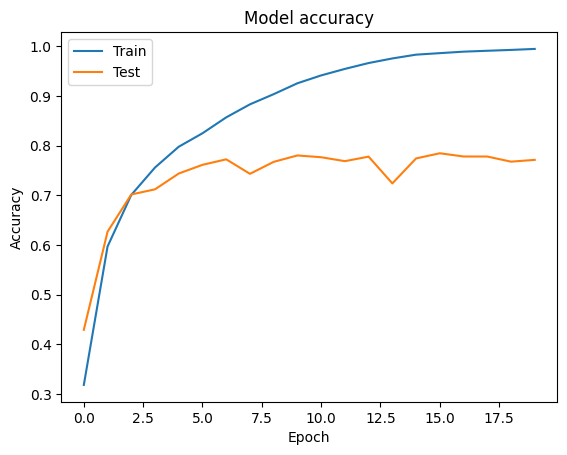

Test Loss: 0.2034, Test Accuracy: 0.7680
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step


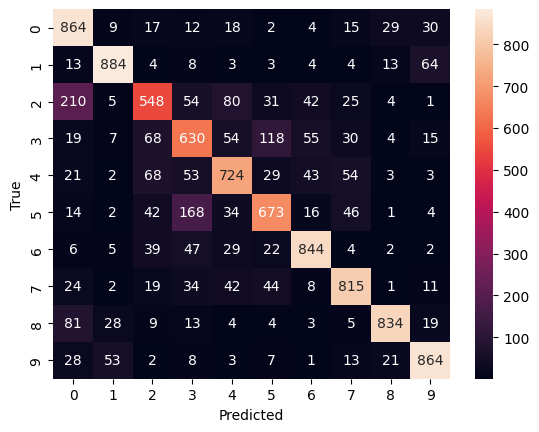

In [14]:
# Main function to run the tasks
def main():
    x_train, y_train, x_test, y_test = load_and_visualize_data()
    # Split training data for validation (simple split for demonstration)
    x_val, y_val = x_train[-10000:], y_train[-10000:]
    x_train, y_train = x_train[:-10000], y_train[:-10000]

    x_train, x_test, x_val, y_train, y_test, y_val = preprocess_data(x_train, x_test, x_val, y_train, y_test, y_val)

    model = build_model()
    model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=METRICS)
    train_model(model, x_train, y_train, x_val, y_val)
    evaluate_model(model, x_test, y_test)

if __name__ == "__main__":
    main()

### 2. Change the loss function

In [12]:
def build_model_1():
    # Create a DenseNet121 base without the top classification layers.
    base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(32, 32, 3), classifier_activation='softmax')
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    return model

# print the model architecture using model.summary()
model = build_model()
model.summary()

OPTIMIZER = SGD(learning_rate=0.05)
LOSS = 'categorical_crossentropy'
METRICS = ['accuracy']
EPOCHS = 20
BATCH_SIZE = 256

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 1, 1, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,146,954 (34.89 MB)

 Trainable params: 9,063,306 (34.57 MB)

 Non-trainable params: 83,648 (326.75 KB)

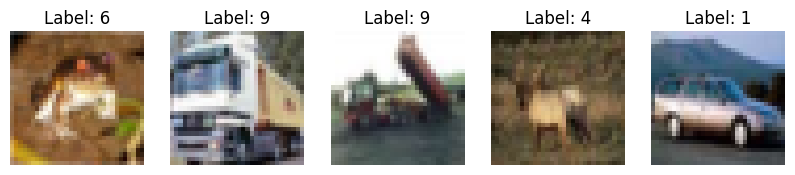

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 174s 560ms/step - accuracy: 0.4937 - loss: 1.4630 - val_accuracy: 0.6687 - val_loss: 1.0092
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 67s 72ms/step - accuracy: 0.8159 - loss: 0.5439 - val_accuracy: 0.6128 - val_loss: 1.1230
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.8835 - loss: 0.3472 - val_accuracy: 0.7624 - val_loss: 0.7497
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.9231 - loss: 0.2282 - val_accuracy: 0.7375 - val_loss: 0.9792
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.9526 - loss: 0.1425 - val_accuracy: 0.6360 - val_loss: 1.3565
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.9582 - loss: 0.1240 - val_accuracy: 0.7453 - val_loss: 1.0306
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.9704 - loss: 0.0863 - val_accuracy: 0.7576 - val_loss: 1.3669
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.9742 - loss: 0.0823 

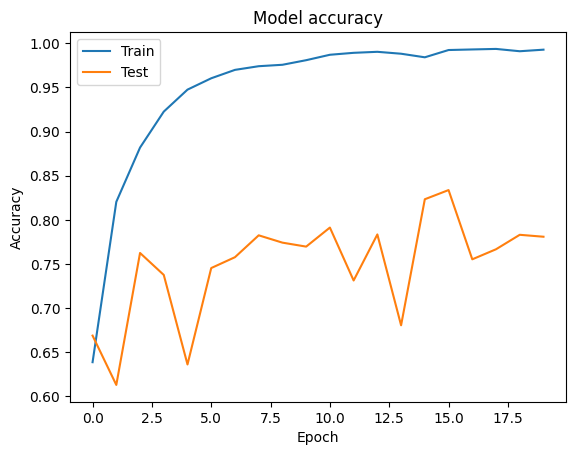

Test Loss: 1.2411, Test Accuracy: 0.7767
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step


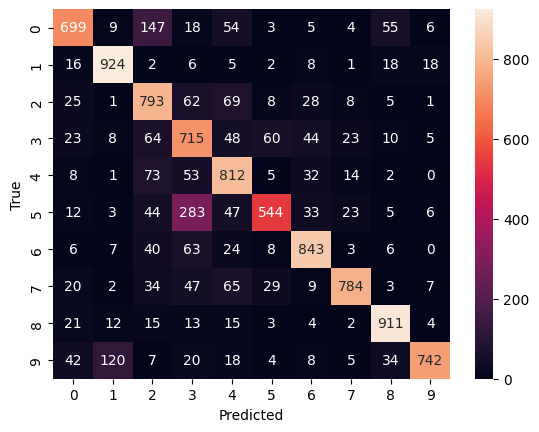

In [13]:
# Main function to run the tasks
def main():
    x_train, y_train, x_test, y_test = load_and_visualize_data()
    # Split training data for validation (simple split for demonstration)
    x_val, y_val = x_train[-10000:], y_train[-10000:]
    x_train, y_train = x_train[:-10000], y_train[:-10000]

    x_train, x_test, x_val, y_train, y_test, y_val = preprocess_data(x_train, x_test, x_val, y_train, y_test, y_val)

    model = build_model()
    model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=METRICS)
    train_model(model, x_train, y_train, x_val, y_val)
    evaluate_model(model, x_test, y_test)

if __name__ == "__main__":
    main()

### 3. Change the optimizer

In [14]:
def build_model_1():
    # Create a DenseNet121 base without the top classification layers.
    base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(32, 32, 3), classifier_activation='softmax')
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    return model

# print the model architecture using model.summary()
model = build_model()
model.summary()

OPTIMIZER = Adam(learning_rate=0.05)
LOSS = 'binary_crossentropy'
METRICS = ['accuracy']
EPOCHS = 20
BATCH_SIZE = 256

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 1, 1, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,146,954 (34.89 MB)

 Trainable params: 9,063,306 (34.57 MB)

 Non-trainable params: 83,648 (326.75 KB)

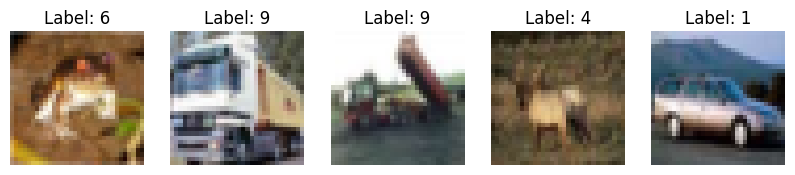

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 249s 663ms/step - accuracy: 0.1007 - loss: 24.1816 - val_accuracy: 0.1003 - val_loss: 0.3253
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 79ms/step - accuracy: 0.0989 - loss: 0.3273 - val_accuracy: 0.1014 - val_loss: 0.3252
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.1031 - loss: 0.3255 - val_accuracy: 0.1022 - val_loss: 0.3252
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.0989 - loss: 0.3253 - val_accuracy: 0.1003 - val_loss: 0.3252
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.0978 - loss: 0.3252 - val_accuracy: 0.1003 - val_loss: 0.3252
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.0991 - loss: 0.3253 - val_accuracy: 0.1014 - val_loss: 0.3252
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.0972 - loss: 0.3252 - val_accuracy: 0.1014 - val_loss: 0.3253
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.1030 - loss: 0.3253

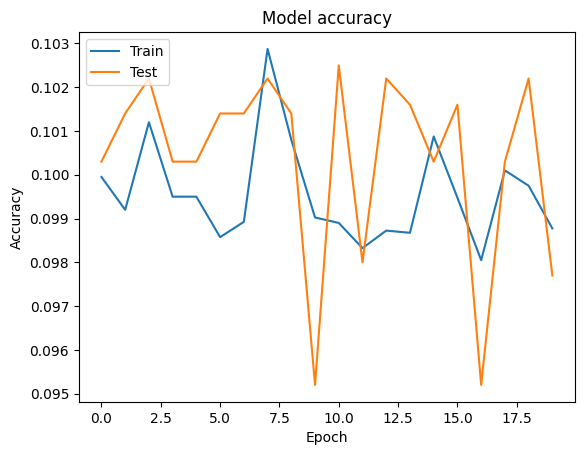

Test Loss: 0.3253, Test Accuracy: 0.1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step


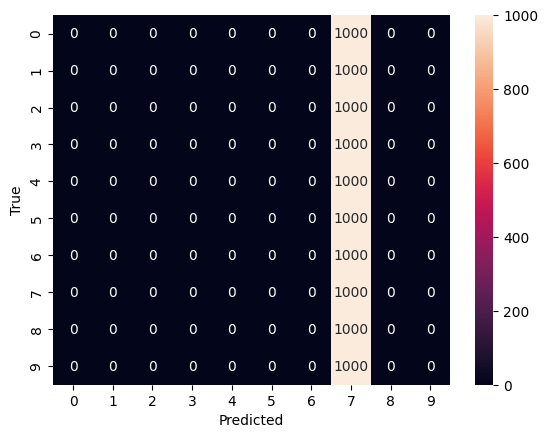

In [15]:
# Main function to run the tasks
def main():
    x_train, y_train, x_test, y_test = load_and_visualize_data()
    # Split training data for validation (simple split for demonstration)
    x_val, y_val = x_train[-10000:], y_train[-10000:]
    x_train, y_train = x_train[:-10000], y_train[:-10000]

    x_train, x_test, x_val, y_train, y_test, y_val = preprocess_data(x_train, x_test, x_val, y_train, y_test, y_val)

    model = build_model()
    model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=METRICS)
    train_model(model, x_train, y_train, x_val, y_val)
    evaluate_model(model, x_test, y_test)

if __name__ == "__main__":
    main()

### Discussion

I conducted four experiments on a CIFAR-10 classifier using a DenseNet121 base for feature extraction. The goal was to assess how changes in model architecture, loss function, and optimizer (along with learning rate) affect training dynamics and overall performance.

---

**Experiment 1 – Base Model**

**Architecture:**  
- The model uses a pre-trained DenseNet121 (without top layers) as a fixed feature extractor.  
- A global average pooling layer is applied on top, followed by two dense layers with 1024 neurons each and ReLU activation.  
- A dropout layer with a rate of 0.25 is added before the final dense softmax layer (10 neurons).

**Hyperparameters:**  
- Optimizer: SGD at a learning rate of **0.05**  
- Loss Function: **binary_crossentropy**  
- Training: 20 epochs, Batch Size: 256

**Performance:**  
- Training accuracy rapidly reached over 99%.  
- Final test accuracy was approximately **77.8%**.

---

**Experiment 2 – Expanded Architecture**

**Architecture:**  
- Expanded the base model by adding extra dense layers.  
- After the DenseNet121 base and global average pooling, two dense layers with 512 neurons each (with ReLU activation) and a dropout (0.25) are added.  
- This is followed by two additional dense layers with 512 neurons each and another dropout (0.25), then the final softmax layer.

**Hyperparameters:**  
- Optimizer: SGD at a learning rate of **0.05**  
- Loss Function: **binary_crossentropy**  
- Training: 20 epochs, Batch Size: 256

**Performance:**  
- Training accuracy still exceeded 99%.  
- The extra layers did not boost generalization; the test accuracy dropped slightly to around **76.8%**.

---

**Experiment 3 – Changing the Loss Function**

**Architecture:**  
- Reverted to the base DenseNet121 model with global average pooling and two 512-neuron dense layers (with dropout 0.25) before the final classifier.

**Hyperparameters:**  
- Optimizer: SGD at a learning rate of **0.05**  
- Loss Function: Changed from **binary_crossentropy** to **categorical_crossentropy**  
- Training: 20 epochs, Batch Size: 256

**Performance:**  
- Training accuracy remained very high (around 99%).  
- Validation performance was similar to the base model with test accuracy roughly in the **77–78%** range.  
- This change aligned the loss function with the one-hot encoded labels but did not produce a marked improvement in test accuracy.

---

**Experiment 4 – Changing the Optimizer**

**Architecture:**  
- Used the base model architecture (DenseNet121 base with global average pooling, two 512-neuron dense layers, dropout 0.25, and final softmax).

**Hyperparameters:**  
- Optimizer: Changed from SGD to **Adam** while keeping the learning rate at **0.05**  
- Loss Function: **binary_crossentropy**  
- Training: 20 epochs, Batch Size: 256

**Performance:**  
- Training failed to progress—both training and validation accuracies remained near **10%** (chance level).  
- This indicates that a learning rate of 0.05 is excessively high for Adam, preventing effective learning.


**Summary Table**


|          Models Description           | Learning Rate  | Training Accuracy | Test Accuracy  |
|:-------------------------------------:|:--------------:|:-----------------:|:--------------:|
| **1. Base Model** (DenseNet121 + two 1024-dense layers, dropout 0.25) | 0.05 (SGD) | ~99.6%          | ~77.8%        |
| **2. Expanded Architecture** (Extra two 512-dense layers, dropout 0.25×2) | 0.05 (SGD) | ~99.5%          | ~76.8%        |
| **3. Loss Function Change** (Base Model with categorical_crossentropy)   | 0.05 (SGD) | ~99.2%          | ~78%       |
| **4. Optimizer Change** (Base Model with Adam optimizer)                 | 0.05 (Adam)| ~10%            | ~10%          |

### Conclusions

* The base DenseNet121 model trained with SGD at a learning rate of 0.05 provided solid performance (approximately 77.8% test accuracy).

* Expanding the architecture with additional dense layers did not improve generalization and slightly reduced test accuracy.
Changing the loss function to categorical_crossentropy produced similar results, suggesting that both loss functions work comparably when used appropriately with the label encoding.

* Using Adam with a high learning rate (0.05) completely hindered learning, underscoring the importance of adjusting learning rates when switching optimizers (Adam typically requires a much lower rate, such as 0.001).